---
title: "Exploratory Data Analysis (EDA): Multivariate"
author: Alison Manna
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
data = pd.read_csv('../data/cleaned/natality_cleaned.csv')
data.head()

,bfacil,mager,mrace6,dmar,meduc,precare,bmi,rf_pdiab,rf_gdiab,rf_phype,...,sex,combgest,dbwt,ab_aven1,ab_aven6,ab_nicu,ab_surf,ab_anti,ab_seiz,no_abnorm
0,Hospital,26,White,Unmarried,"Some college credit, not a degree",6,24.200001,False,False,False,...,F,39,3150,False,False,False,False,False,False,True
1,Hospital,20,White,Unmarried,"Some college credit, not a degree",1,20.400000,False,False,False,...,F,41,2466,False,False,False,False,False,False,True
2,Hospital,29,Asian,Married,Doctorate,2,19.500000,False,False,False,...,F,39,2620,False,False,False,False,False,False,True
3,Hospital,18,White,Married,9th-12th no diploma,4,33.400002,False,False,False,...,M,40,3360,False,False,False,False,False,False,True
4,Other,25,White,Married,"Some college credit, not a degree",4,23.000000,False,False,False,...,M,39,2930,False,False,False,False,False,False,True


### Data Overview

In [3]:
print(f"Number of rows: {len(data)}")
print(f"\nData types: {data.dtypes}")
print(f"\nSummary stats: {data.describe()}")

Number of rows: 10000

Data types: bfacil        object
mager          int64
mrace6        object
dmar          object
meduc         object
precare        int64
bmi          float64
rf_pdiab        bool
rf_gdiab        bool
rf_phype        bool
rf_ghype        bool
rf_ehype        bool
no_risks        bool
ip_gon          bool
ip_syph         bool
ip_chlam        bool
ip_hepb         bool
ip_hepc         bool
no_infec        bool
ld_indl         bool
ld_augm         bool
ld_ster         bool
ld_antb         bool
ld_chor         bool
ld_anes         bool
me_rout       object
mm_mtr          bool
mm_plac         bool
mm_rupt         bool
mm_uhyst        bool
mm_aicu         bool
apgar5         int64
dplural        int64
sex           object
combgest       int64
dbwt           int64
ab_aven1        bool
ab_aven6        bool
ab_nicu         bool
ab_surf         bool
ab_anti         bool
ab_seiz         bool
no_abnorm       bool
dtype: object

Summary stats:               mager       precar

### Inspect Categorical Variables

In [4]:
# rename w category tags: 
# _E = exposure, _O = outcome, _C = covariate, _X = other
rename_map = {
    "bfacil": "birth_place_C",
    "mager": "mother_age_C",
    "mrace6": "mother_race_C",
    "dmar": "marital_status_C",
    "meduc": "mother_education_C",
    "precare": "prenatal_care_month_C",
    "bmi": "bmi_C",
    "rf_pdiab": "risk_prepreg_diabetes_E",
    "rf_gdiab": "risk_gest_diabetes_E",
    "rf_phype": "risk_pre_hypertension_E",
    "rf_ghype": "risk_gest_hypertension_E",
    "rf_ehype": "risk_eclampsia_E",
    "no_risks": "no_risks_reported_X",
    "ip_gon": "infection_gonorrhea_E",
    "ip_syph": "infection_syphilis_E",
    "ip_chlam": "infection_chlamydia_E",
    "ip_hepb": "infection_hepb_E",
    "ip_hepc": "infection_hepc_E",
    "no_infec": "no_infections_reported_X",
    "ld_indl": "labor_induction_X",
    "ld_augm": "labor_augmentation_X",
    "ld_ster": "steroids_X",
    "ld_antb": "antibiotics_X",
    "ld_chor": "chorioamnionitis_X",
    "ld_anes": "anesthesia_X",
    "me_rout": "delivery_method_O",
    "mm_mtr": "maternal_transfusion_X",
    "mm_plac": "perineal_laceration_X",
    "mm_rupt": "uterine_rupture_X",
    "mm_uhyst": "unplanned_hysterectomy_X",
    "mm_aicu": "admit_icu_X",
    "apgar5": "apgar5_O",
    "dplural": "multiples_count_C",
    "sex": "infant_sex_C",
    "combgest": "gestation_weeks_O",
    "dbwt": "birth_weight_g_O",
    "ab_aven1": "assist_vent_immediate_O",
    "ab_aven6": "assist_vent_gt6hr_O",
    "ab_nicu": "nicu_admission_O",
    "ab_surf": "surfactant_O",
    "ab_anti": "newborn_antibiotics_O",
    "ab_seiz": "newborn_seizures_O",
    "no_abnorm": "no_abnormal_conditions_X"
}
data = data.rename(columns=rename_map)
print("Columns now:", list(data.columns))

Columns now: ['birth_place_C', 'mother_age_C', 'mother_race_C', 'marital_status_C', 'mother_education_C', 'prenatal_care_month_C', 'bmi_C', 'risk_prepreg_diabetes_E', 'risk_gest_diabetes_E', 'risk_pre_hypertension_E', 'risk_gest_hypertension_E', 'risk_eclampsia_E', 'no_risks_reported_X', 'infection_gonorrhea_E', 'infection_syphilis_E', 'infection_chlamydia_E', 'infection_hepb_E', 'infection_hepc_E', 'no_infections_reported_X', 'labor_induction_X', 'labor_augmentation_X', 'steroids_X', 'antibiotics_X', 'chorioamnionitis_X', 'anesthesia_X', 'delivery_method_O', 'maternal_transfusion_X', 'perineal_laceration_X', 'uterine_rupture_X', 'unplanned_hysterectomy_X', 'admit_icu_X', 'apgar5_O', 'multiples_count_C', 'infant_sex_C', 'gestation_weeks_O', 'birth_weight_g_O', 'assist_vent_immediate_O', 'assist_vent_gt6hr_O', 'nicu_admission_O', 'surfactant_O', 'newborn_antibiotics_O', 'newborn_seizures_O', 'no_abnormal_conditions_X']


In [5]:
# show numpy arrays of uniques
# make dplural, precare columns categorical
data['multiples_count_C'] = data['multiples_count_C'].astype('category')
data['prenatal_care_month_C'] = data['prenatal_care_month_C'].astype('category')
data['apgar5_O'] = data['apgar5_O'].astype('category')
data.select_dtypes(include=['object', 'category']).apply(lambda x: x.unique())

birth_place_C            [Hospital, Other, Home (intended), Freestandin...
mother_race_C            [White, Asian, Black, More than one race, Amer...
marital_status_C                                      [Unmarried, Married]
mother_education_C       [Some college credit, not a degree, Doctorate,...
prenatal_care_month_C    [6, 1, 2, 4, 9, ..., 0, 7, 5, 8, 10]
Length: 1...
delivery_method_O                 [Spontaneous, Cesarean, Vacuum, Forceps]
apgar5_O                 [9, 8, 6, 10, 7, ..., 1, 2, 5, 3, 0]
Length: 1...
multiples_count_C               [1, 2, 3]
Categories (3, int64): [1, 2, 3]
infant_sex_C                                                        [F, M]
dtype: object

### Numerical Variables

In [ ]:
num_df = data.select_dtypes(include=['int64', 'float64'])
num_df.head()

,mother_age_C,bmi_C,gestation_weeks_O,birth_weight_g_O
0,26,24.200001,39,3150
1,20,20.400000,41,2466
2,29,19.500000,39,2620
3,18,33.400002,40,3360
4,25,23.000000,39,2930


### Pairplot

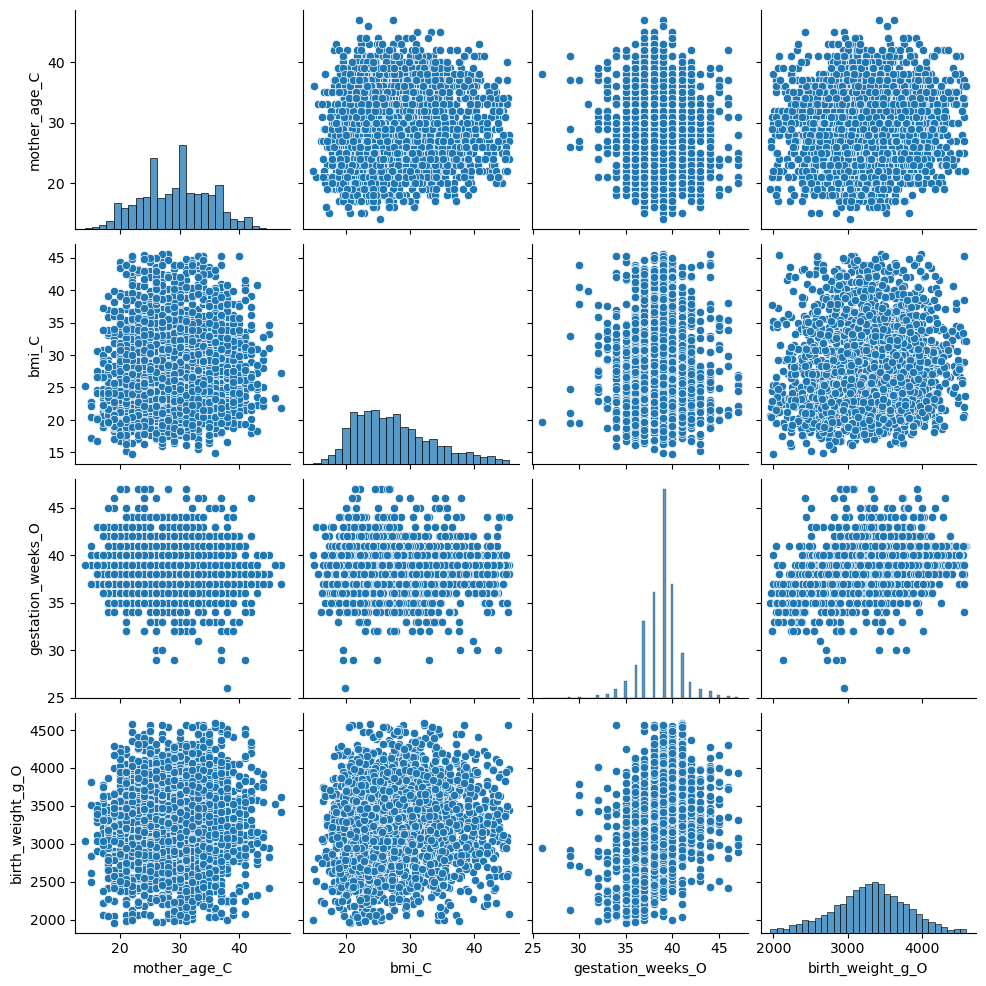

In [29]:
# pairplot of sample
pairplot = sns.pairplot(num_df.sample(n=3000, random_state=5100))
plt.savefig("../plots/eda/multivar/pairplot_natality_numeric_sample.png", dpi=300)

### Proportions/Frequencies


assist_vent_immediate_O:
assist_vent_immediate_O     False     True 
row_0                                      
False                    0.947066  0.052934
True                     0.902844  0.097156

nicu_admission_O:
nicu_admission_O     False     True 
row_0                               
False             0.926289  0.073711
True              0.836493  0.163507

newborn_seizures_O:
newborn_seizures_O     False     True 
row_0                                 
False               0.999374  0.000626
True                1.000000  0.000000


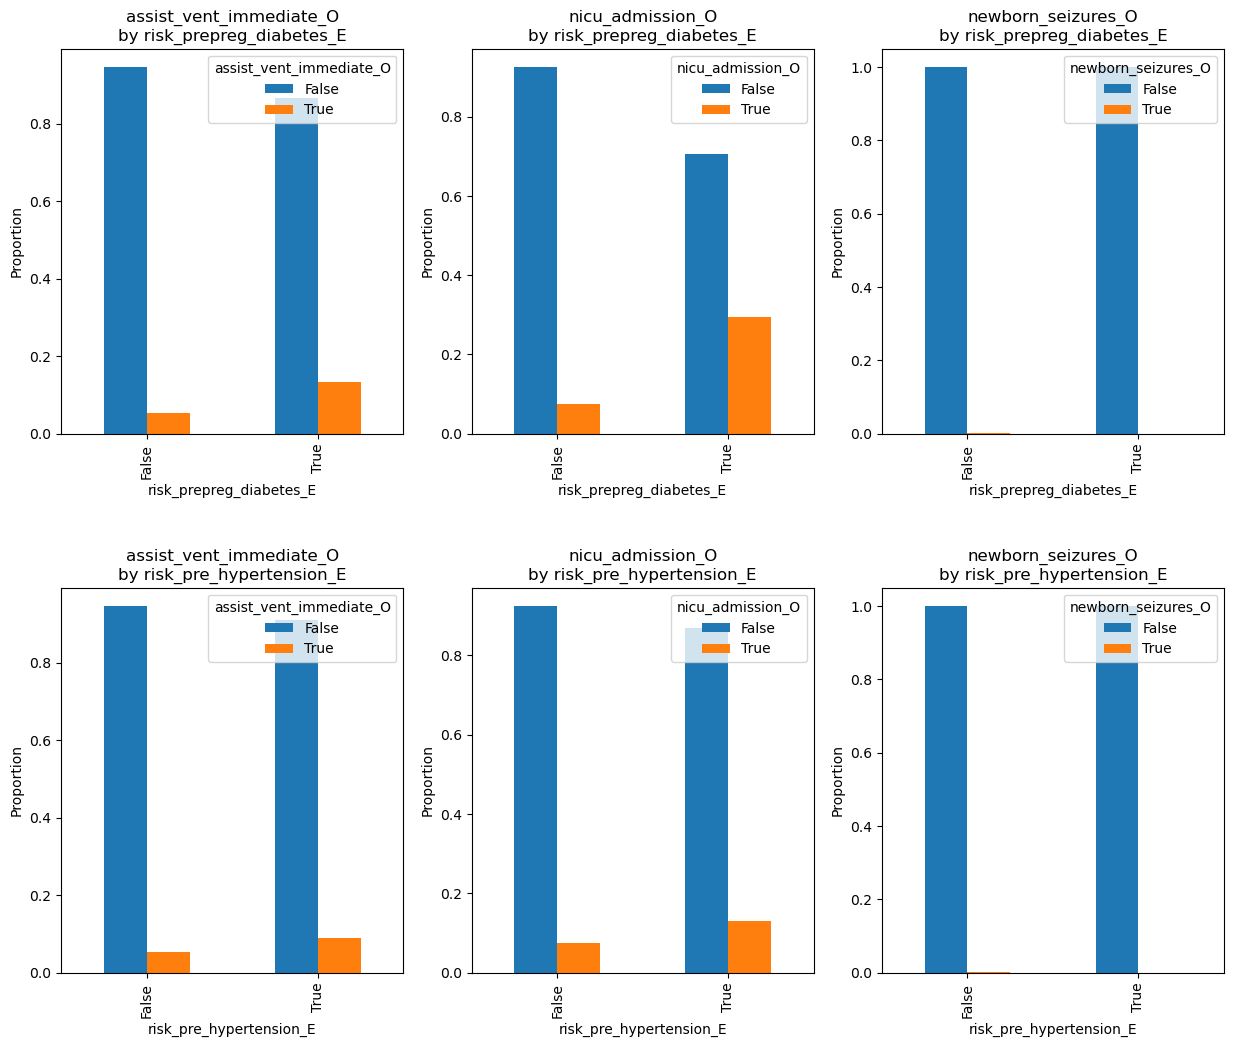

In [31]:
# For binary outcomes
for outcome in ['assist_vent_immediate_O', 'nicu_admission_O', 'newborn_seizures_O']:
    prop_table = pd.crosstab(
        data[['risk_prepreg_diabetes_E', 'risk_pre_hypertension_E']].any(axis=1),
        data[outcome],
        normalize='index'
    )
    print(f"\n{outcome}:")
    print(prop_table)
    
# Visualize
fig, axes = plt.subplots(2, 3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.4)

for idx, outcome in enumerate(['assist_vent_immediate_O', 'nicu_admission_O', 'newborn_seizures_O']):
    for jdx, exposure in enumerate(['risk_prepreg_diabetes_E', 'risk_pre_hypertension_E']):
        ax = axes[jdx, idx]
        pd.crosstab(data[exposure], data[outcome], normalize='index').plot(
            kind='bar', ax=ax, legend=True
        )
        ax.set_title(f'{outcome}\nby {exposure}')
        ax.set_ylabel('Proportion') 

plt.savefig("../plots/eda/multivar/crosstab_natality_exposures_outcomes.png", dpi=300)

### Heatmap

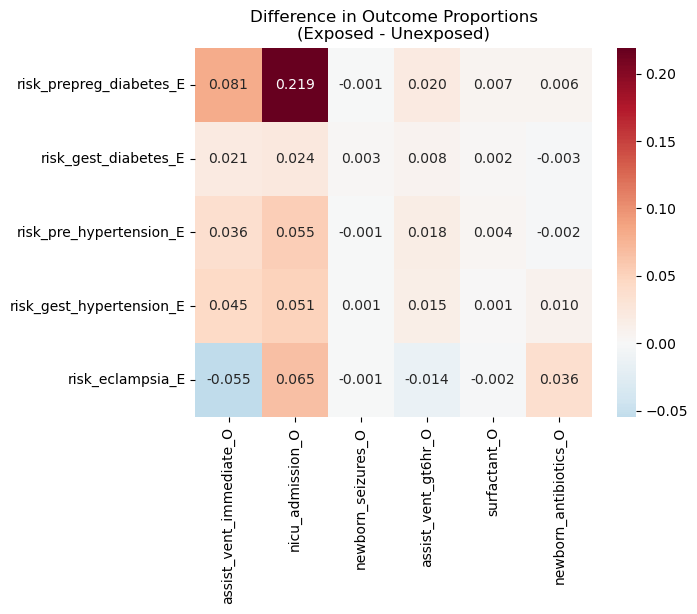

In [32]:
exposure_vars = ['risk_prepreg_diabetes_E', 'risk_gest_diabetes_E', 'risk_pre_hypertension_E', 'risk_gest_hypertension_E', 'risk_eclampsia_E']

# Calculate raw proportion differences (no testing yet)
def prop_difference(data, exposure, outcome, outcome_value=True):
    # Calculate difference in outcome proportion between exposed/unexposed
    exposed = data[data[exposure] == True][outcome].mean()
    unexposed = data[data[exposure] == False][outcome].mean()
    return exposed - unexposed

# heatmap of proportion differences
categorical_outcomes = ['assist_vent_immediate_O', 'nicu_admission_O', 
                       'newborn_seizures_O', 'assist_vent_gt6hr_O', 'surfactant_O', 'newborn_antibiotics_O'] # surfactant_O, newborn_antibiotics_O

prop_diff_matrix = pd.DataFrame(index=exposure_vars, 
                                columns=categorical_outcomes)

for exposure in exposure_vars:
    for outcome in categorical_outcomes:
        diff = prop_difference(data, exposure, outcome)
        prop_diff_matrix.loc[exposure, outcome] = diff

sns.heatmap(prop_diff_matrix.astype(float), annot=True, cmap='RdBu_r',
            center=0, fmt='.3f')
plt.title('Difference in Outcome Proportions\n(Exposed - Unexposed)')
plt.savefig("../plots/eda/multivar/prop_diff_heatmap_natality.png", dpi=300)

### APGAR score distribution

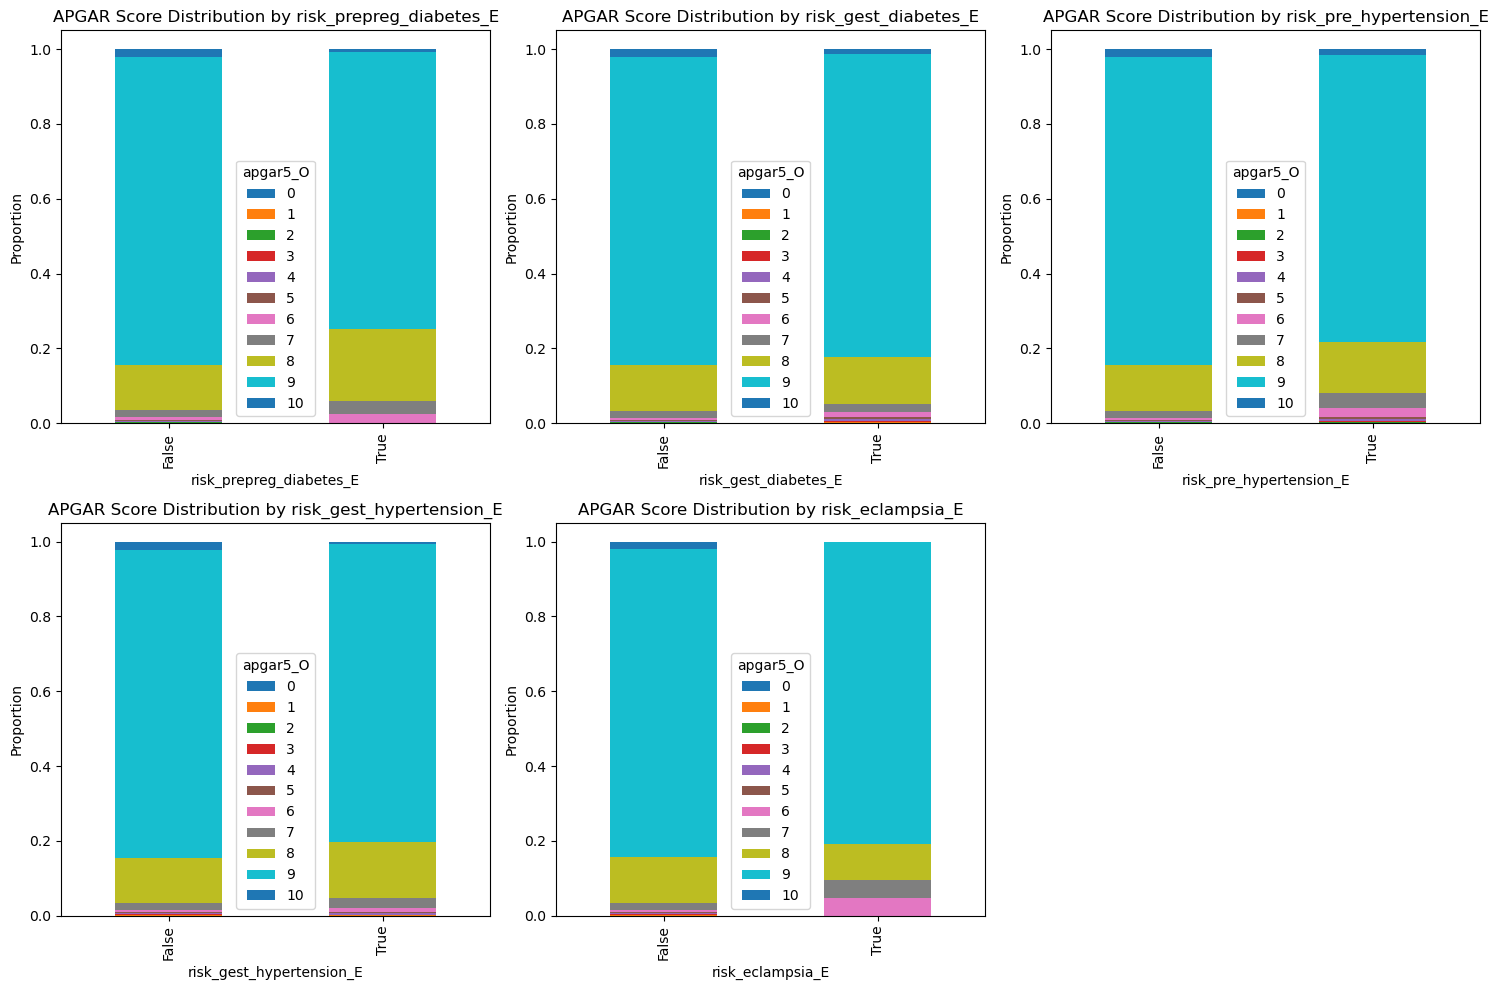

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten() # flatten, use single index for iteration

for i, exposure in enumerate(exposure_vars):
    ax = axes[i]
    data.groupby(exposure)['apgar5_O'].value_counts(normalize=True).unstack().plot(
        kind='bar', stacked=True, ax=ax
    )
    ax.set_title(f'APGAR Score Distribution by {exposure}')
    ax.set_ylabel('Proportion')

# remove unused subplot
axes[5].axis('off')

plt.tight_layout()
plt.savefig("../plots/eda/multivar/apgar_by_exposures_natality.png", dpi=300)

### Boxplots of Continuous Outcomes by Condition/Exposure

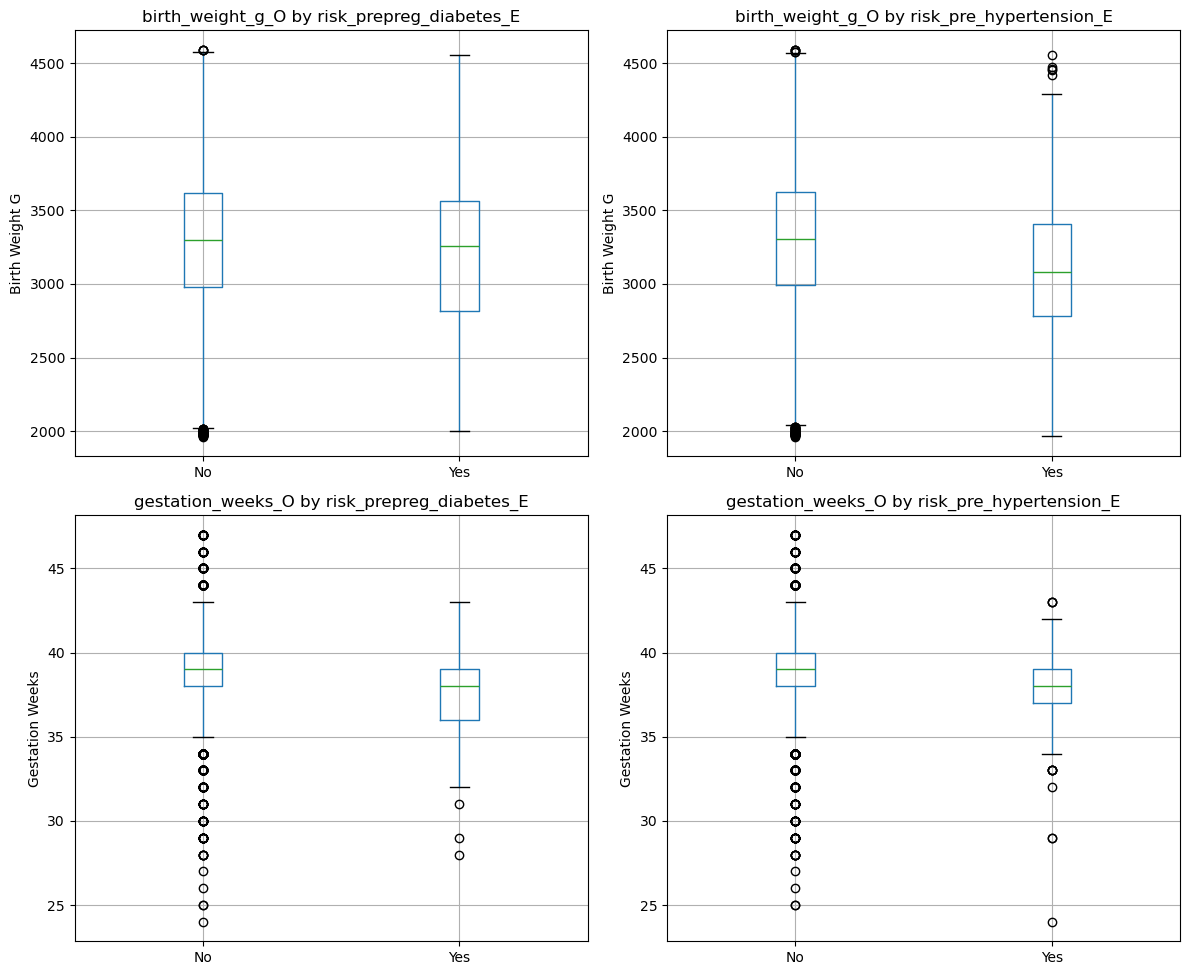

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

continuous_outcomes = ['birth_weight_g_O', 'gestation_weeks_O']
main_exposures = ['risk_prepreg_diabetes_E', 'risk_pre_hypertension_E']

for idx, outcome in enumerate(continuous_outcomes):
    for jdx, exposure in enumerate(main_exposures):
        ax = axes[idx, jdx]
        data.boxplot(column=outcome, by=exposure, ax=ax)
        ax.set_title(f'{outcome} by {exposure}')
        ax.set_xlabel('')
        ax.set_ylabel(outcome.replace('_O', '').replace('_', ' ').title())
        plt.sca(ax)
        plt.xticks([1, 2], ['No', 'Yes'])

plt.suptitle('')  # remove automatic suptitle 
plt.tight_layout()
plt.savefig("../plots/eda/multivar/boxplots_natality_exposures_outcomes.png", dpi=300)

### REMOVE: Violin/Box Plots

In [ ]:
# violin / box plots to explore exposures -> outcomes with optional covariates

import matplotlib.pyplot as plt
import seaborn as sns

# quick lists
exposures = [
    "risk_gest_diabetes_E",
    "risk_gest_hypertension_E",
    "risk_eclampsia_E"
]

outcomes = [
    "gestation_weeks_O",
    "birth_weight_g_O",
    "apgar5_O",
    "nicu_admission_O" 
]
covariates = [
    "mother_age_C",
    "mother_race_C",
    "bmi_C"
]

def plot_exposure_vs_outcome(df, exposure, outcome, covariate = None, sample_n = 4000):
    # copy & drop na
    sub = df[[exposure, outcome] + ([covariate] if covariate else [])].dropna()
    if sub.empty:
        print(f"No data for {exposure} x {outcome} (after dropna).")
        return
    # convert boolean exposures to int for grouping
    if pd.api.types.is_bool_dtype(sub[exposure]) or sub[exposure].dtype.name == 'boolean':
        sub[exposure] = sub[exposure].astype(int).astype(str)  # 0/1 categories
    else:
        sub[exposure] = sub[exposure].astype(str)
    # handle covariate: if numeric, bin into quartiles; if too many categories, ignore hue
    hue = None
    if covariate and covariate in sub.columns:
        if pd.api.types.is_numeric_dtype(sub[covariate]):
            try:
                sub[covariate + "_bin"] = pd.qcut(sub[covariate], q=4, duplicates='drop').astype(str)
                hue = covariate + "_bin"
            except Exception:
                hue = None
        else:
            if sub[covariate].nunique() <= 8:
                hue = covariate
            else:
                hue = None
    # for speed
    if len(sub) > sample_n:
        sub = sub.sample(sample_n, random_state = 5100)
    # plot
    plt.figure(figsize = (8,6))
    sns.violinplot(x = exposure, y = outcome, hue = hue, data = sub, inner = 'quartile', cut = 0)
    title = f"{outcome} by {exposure}" + (f" (hue={hue})" if hue else "")
    plt.title(title)

    # save
    # plt_filename = f"../plots/eda/multivar/plot_{exposure}_vs_{outcome}" + (f"_by_{hue}" if hue else "") + ".png"
    # plt.savefig(plt_filename)
    # plt.show()

# generate a small grid of plots: each exposure x a couple of outcomes, with two covariates shown
# plot_covariates = ["infant_sex_C", "mother_race_C"]
for exp in exposures:
    for out in outcomes:
        # first without covariate
        plot_exposure_vs_outcome(data, exp, out, covariate=None)
        # then with covariates (if present)
        for cov in covariates:
            plot_exposure_vs_outcome(data, exp, out, covariate=cov)

In [ ]:
bool_cols = data.select_dtypes(include=['bool']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns
pb = pd.DataFrame(index=bool_cols, columns=num_cols, dtype=float)
for b in bool_cols:
    for ncol in num_cols:
        try:
            r, p = pointbiserialr(data[b].astype(int), data[ncol].fillna(data[ncol].median()))
        except Exception:
            r = np.nan
        pb.loc[b, ncol] = r

plt.figure(figsize = (10,6))
sns.heatmap(pb.astype(float), center=0, cmap='coolwarm')
plt.title("Point-biserial correlation (bool vs numeric)")

# plt.show()